In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sql_functions import read_query




In [3]:
query = 'select * from customers limit 4;'
read_query(query)

,CustomerID,FirstName,LastName,Email,Phone,Address,State
0,C-2023-100-1,Mahika,Sunder,MahikaSunder_11@zmail.com,03412176590,"H.No. 155, Chana",Assam
1,C-2023-100-10,Zeeshan,Vasa,ZeeshanVasa_1@zmail.com,+911151051656,"52, Roy Nagar",Tripura
2,C-2023-100-100,Aaina,Sachdeva,AainaSachdeva_9@zmail.com,+918834507719,"75/92, Kade Marg",Nagaland
3,C-2023-100-101,Shray,Bajwa,ShrayBajwa_11@zmail.com,07410498662,"45, Bora Ganj",Manipur


In [4]:
query = 'show tables;'
read_query(query)

,Tables_in_swiftmarket
0,categories
1,customers
2,employees
3,salesdata
4,subcategories
5,suppliers


In [5]:
query = """select * from salesdata limit 3;"""
read_query(query)

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.00
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.00
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.00


In [6]:
query = """Select s.customerid, c.firstname, s.saledate, s.totalprice
from salesdata s
join customers c
on s.customerid= c.customerid
limit 5;"""

read_query(query)

,customerid,firstname,saledate,totalprice
0,C-2023-100-1,Mahika,2023-07-22,67312.00
1,C-2023-100-1,Mahika,2023-05-23,176466.00
2,C-2023-100-1,Mahika,2023-11-26,190332.00
3,C-2023-100-1,Mahika,2023-03-31,205080.00
4,C-2023-100-1,Mahika,2023-11-22,14174.00


In [7]:
query = """
Select customerid,sum(totalprice) as expenditure
from salesdata 
group by customerid 
limit 5;"""

read_query(query)

,customerid,expenditure
0,C-2023-100-1,9933032.00
1,C-2023-100-10,9779316.00
2,C-2023-100-100,9889393.00
3,C-2023-100-101,9168084.00
4,C-2023-100-102,10315608.00


In [8]:
query = """ 
select t.customerid,c.firstname,t.expenditure
from 
(select customerid,
sum(totalprice) as expenditure
from salesdata 
group by customerid) t
join customers c
on t.customerid=c.customerid;"""

read_query(query)

,customerid,firstname,expenditure
0,C-2023-100-1,Mahika,9933032.00
1,C-2023-100-10,Zeeshan,9779316.00
2,C-2023-100-100,Aaina,9889393.00
3,C-2023-100-101,Shray,9168084.00
4,C-2023-100-102,Navya,10315608.00
...,...,...,...
195,C-2023-100-95,Taran,8826287.00
196,C-2023-100-96,Bhamini,9996920.00
197,C-2023-100-97,Hunar,10432046.00
198,C-2023-100-98,Riaan,8863324.00


In [9]:
query = """ 
select t.customerid,c.firstname,t.expenditure
from 
(select customerid,
sum(totalprice) as expenditure
from salesdata 
group by customerid) t
join customers c
on t.customerid=c.customerid
order by t.expenditure desc
limit 10;"""

top_annual_customers = read_query(query)
top_annual_customers

,customerid,firstname,expenditure
0,C-2023-100-13,Veer,13016064.00
1,C-2023-100-94,Priyansh,12629337.00
2,C-2023-100-57,Riya,12599608.00
3,C-2023-100-58,Vanya,12455437.00
4,C-2023-100-88,Dhruv,12280916.00
5,C-2023-100-165,Tarini,12130487.00
6,C-2023-100-197,Yuvraj,11868602.00
7,C-2023-100-199,Rhea,11704275.00
8,C-2023-100-196,Darshit,11520699.00
9,C-2023-100-75,Prerak,11442527.00


In [10]:
top_annual_customers['expenditure'].astype(float)

0    13016064.0
1    12629337.0
2    12599608.0
3    12455437.0
4    12280916.0
5    12130487.0
6    11868602.0
7    11704275.0
8    11520699.0
9    11442527.0
Name: expenditure, dtype: float64

In [11]:
top_annual_customers['expenditure'].values

array([Decimal('13016064.00'), Decimal('12629337.00'),
       Decimal('12599608.00'), Decimal('12455437.00'),
       Decimal('12280916.00'), Decimal('12130487.00'),
       Decimal('11868602.00'), Decimal('11704275.00'),
       Decimal('11520699.00'), Decimal('11442527.00')], dtype=object)

In [12]:
top_annual_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customerid   10 non-null     object
 1   firstname    10 non-null     object
 2   expenditure  10 non-null     object
dtypes: object(3)
memory usage: 372.0+ bytes


In [13]:
customer_names = top_annual_customers['firstname'].values

In [14]:
top_annual_customers['expenditure'] = top_annual_customers['expenditure'].astype(float)

In [15]:
customer_exp = top_annual_customers['expenditure'].values

<h1 style='color:white; font-family:roboto; font-size:50px'>using cmap

<h1 style>

In [16]:
# cmap = plt.cm.PuBuGn(np.linspace(0.5,1,len(products)))

In [17]:
cmap_val = np.linspace(0.3,1,10)

In [18]:
# cmap = plt.cm.PuBuGn(cmap_val)

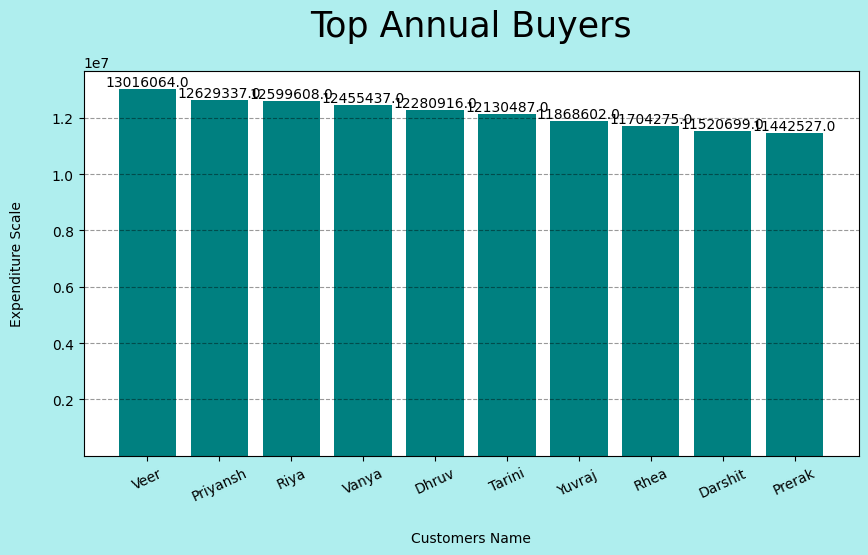

In [19]:
                       # colors = make a list n then pass it to the bar
plt.figure(figsize=(10,5))
plt.bar(height=customer_exp,x=customer_names,bottom=20,width=0.8,color='teal')
# plt.plot(color='green')

#title of the graph
plt.title('Top Annual Buyers',pad=25,size=25,color='black')


#customizing the graph
plt.xlabel('Customers Name',labelpad=20)
plt.ylabel('Expenditure Scale',labelpad=20)

#providing sticks
plt.xticks(rotation=25)

#making grids
plt.grid(axis='y',alpha=0.4,color='black',ls='dashed')
plt.gcf().set_facecolor('paleturquoise')


#giving annotations
for i in range(len(customer_names)):

    plt.annotate(text=customer_exp[i],xy=(i,customer_exp[i]),
                 horizontalalignment='center',#center,right,left
                 verticalalignment='bottom') ,#top,bottom.center

    
# plt.savefig('Top_buyers.jpeg')


plt.show()

In [20]:
query = 'show tables;'
read_query(query)

,Tables_in_swiftmarket
0,categories
1,customers
2,employees
3,salesdata
4,subcategories
5,suppliers


In [21]:
query = 'select * from salesdata limit 10;'
read_query(query)

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.00
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.00
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.00
3,23003,C-2023-100-72,6006,1016,2023-08-01,2,117644.00
4,23004,C-2023-100-142,6030,1067,2023-03-06,5,336560.00
5,23005,C-2023-100-72,6015,1012,2023-11-22,5,396935.00
6,23006,C-2023-100-78,6015,1044,2023-10-26,5,396935.00
7,23007,C-2023-100-36,6017,1018,2023-03-29,5,295510.00
8,23008,C-2023-100-147,6030,1049,2023-01-17,3,201936.00
9,23009,C-2023-100-7,6019,1047,2023-07-19,4,56188.00


In [22]:
# query 
query = """select monthname(s.saledate) as monthname,
    e.firstname,
    sum(s.totalprice) as totalsales
 from salesdata s
    join employees e
    on s.employeeid = e.employeeid
where monthname(saledate) = 'january'
group by monthname(s.saledate),e.firstname
order by totalsales desc
limit 10;"""

df = read_query(query)


# fetching values
df['totalsales'] = df['totalsales'].astype(float)
df = read_query(query=query)
sales = df['totalsales'].values
names = df['firstname'].values




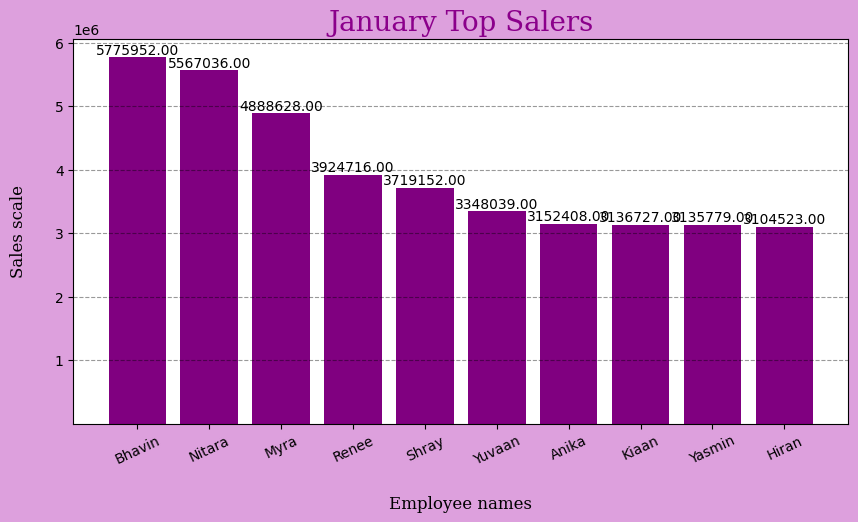

In [23]:
# graph fonts
font = {'family': 'serif',
        'color':  'darkmagenta',
        'weight': 'normal',
        'size': 20,
        }
font2 = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }
font3 = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }


# figure
plt.figure(figsize=(10,5))
plt.bar(height=sales,x=names,bottom=20,width=0.8,color='purple')

# title
plt.title('January Top Salers',fontdict= font)

# labels of the graph 
plt.xlabel('Employee names',labelpad=20,fontdict=font2)
plt.ylabel('Sales scale',labelpad=20,fontdict=font3)


# setting grids,sticks
plt.grid(axis ='y',alpha=0.4,color='black',ls='dashed')
plt.gcf().set_facecolor('plum')
plt.xticks(rotation=25)


# annotation 
for i in range(len(names)):
    
    plt.annotate(text=sales[i],xy=(i,sales[i]),
                 horizontalalignment='center',#center,right,left
                 verticalalignment='bottom') ,#top,bottom.center

plt.show()


Starting of the Project

1. Provide a visual representation of our annual sales performance over time?


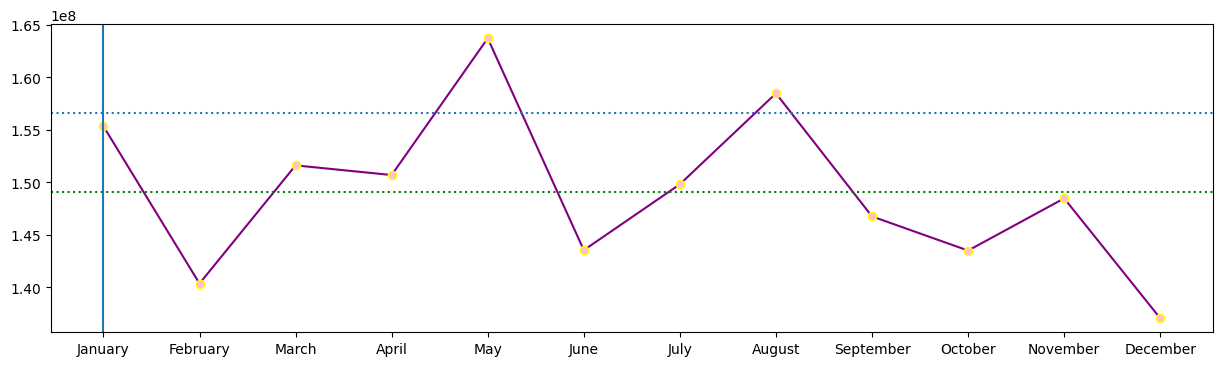

In [61]:
# query for the database
query = """select months,monthlysales 
from
	( select month(saledate),monthname(saledate) as months,
	sum(totalprice) as monthlysales
	from salesdata
	group by month(saledate),monthname(saledate)
	order by month(saledate)) t;"""

df = read_query(query)

# fetching values
months = df['months'].values 
sales = df['monthlysales'].astype('float').values

# annual average and goal line 
annual_avg = df['monthlysales'].mean()
goal = annual_avg*1.05



# figure of graph 
plt.figure(figsize=(15,4)) 
plt.plot(months,sales,color='purple',marker='o',mec='yellow',markerfacecolor='pink') 
plt.axhline(y=annual_avg,color='green',ls = 'dotted')   #annual avg line 
plt.axhline(y=goal,ls='dotted')
plt.axvline()

plt.show()


2. The client is interested in understanding how the sales have been fluctuating
over time to identify any underlying patterns or anomalies Analyze the trend in
our monthly sales using a moving average technique

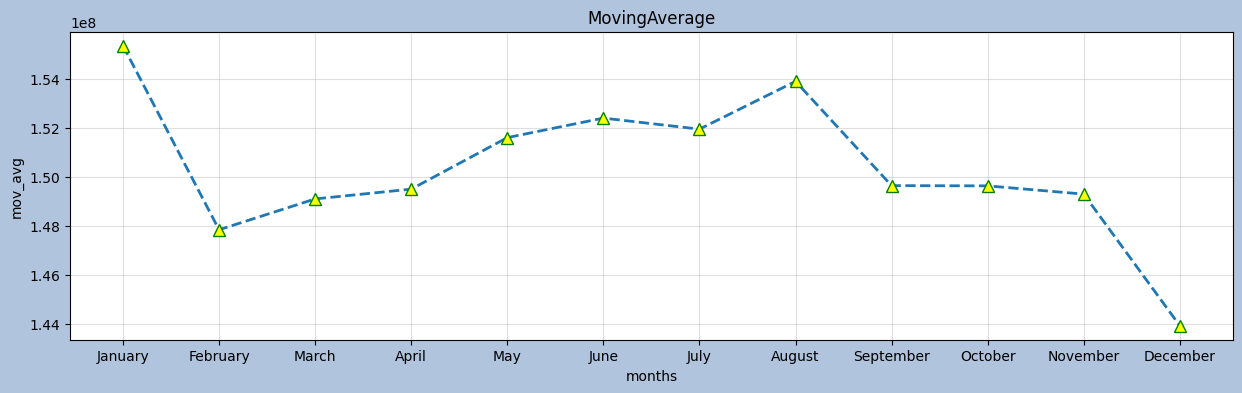

In [25]:
# query for the database
query = """ select
months,
AVG(monthlysales) OVER (ORDER BY monthnum ROWS BETWEEN 3
PRECEDING AND CURRENT ROW) AS MovingAverage
from
(SELECT
month(saledate) monthnum,
monthname(SaleDate) as months,
sum(totalprice) as monthlysales
FROM Salesdata
Group by month(saledate),monthname(saledate)) t;
"""
mavg = read_query(query)

# fetching values
months = mavg['months'].values
moving_avg = mavg['MovingAverage'].astype(float).values



# determing the figure size
plt.figure(figsize=(15,4),facecolor='lightsteelblue') 
plt.plot(months,moving_avg,ls='dashed',marker='^',mec = 'green',ms = 8,mfc = 'yellow',lw =2) 

# title    
plt.title('MovingAverage')

# labels of graph
plt.xlabel('months')
plt.ylabel('mov_avg')


plt.grid(alpha=0.4)


# for i in range(len(months)):

#     plt.annotate(text=moving_avg[i],xy=(i,moving_avg[i]),
#                   horizontalalignment='center',
#                   verticalalignment='bottom')





plt.show()

3. Explore the month-over-month growth rate in sales

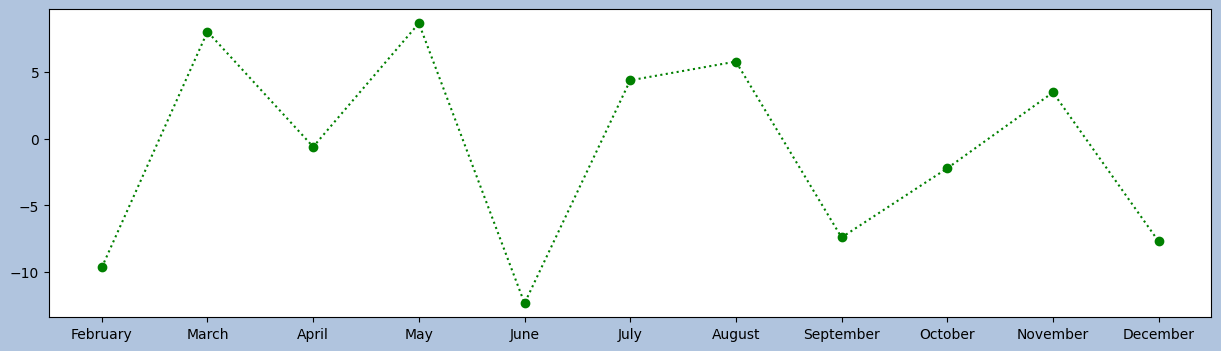

In [26]:
# query
query = """ SELECT
MONTH(SaleDate) AS Monthnum,
monthname(saledate) as months,
100*(SUM(TotalPrice) - LAG(SUM(TotalPrice)) OVER (ORDER BY
MONTH(SaleDate)))/
LAG(SUM(TotalPrice)) OVER (ORDER BY MONTH(SaleDate))AS
'growthrate'
FROM Salesdata
GROUP BY YEAR(SaleDate), MONTH(SaleDate),monthname(saledate)
ORDER BY YEAR(SaleDate), MONTH(SaleDate),monthname(saledate);
"""
df = read_query(query)
df



# fetching values
months = df['months'].values
growthrate = df['growthrate'].astype(float).values



# plotting graph
plt.figure(figsize=(15,4),facecolor='lightsteelblue')
plt.plot(months,growthrate,marker='o',ls='dotted',color='green')



plt.show()

4. identify the top-performing sales representatives based on their total sales
volume


In [143]:
cmap_c = np.linspace(1,0,10)
cmap= plt.cm.Greys(cmap_c)

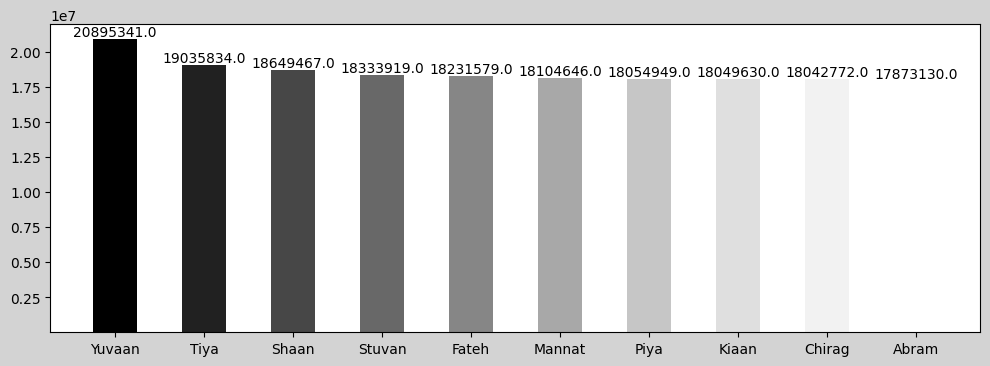

In [144]:
# query for the graph
query = """ select t.employeeid,e.firstname,t.totalsales
from
(select employeeid,sum(totalprice) as totalsales
from salesdata
group by EmployeeID) t
join employees e
on t.employeeid=e.EmployeeID
order by t.totalsales desc
limit 10;

"""
sales_rep = read_query(query)
sales_rep


# fetching values
names = sales_rep['firstname'].values
names

sales = sales_rep['totalsales'].astype(float).values
sales



# plotting graph
plt.figure(figsize=(12,4),facecolor='lightgrey')
plt.bar(height=sales,x=names,bottom=20,width=0.5,color=cmap)

# putting annotations

for i in range(0,len(names)):

    plt.annotate(text=sales[i],xy=(i,sales[i]),
                 horizontalalignment='center',
                 verticalalignment='bottom')
    

plt.show()

5. What are the total sales made by each employee?

In [28]:
cmap_c = np.linspace(0,1,10)
cmap= plt.cm.summer(cmap_c)

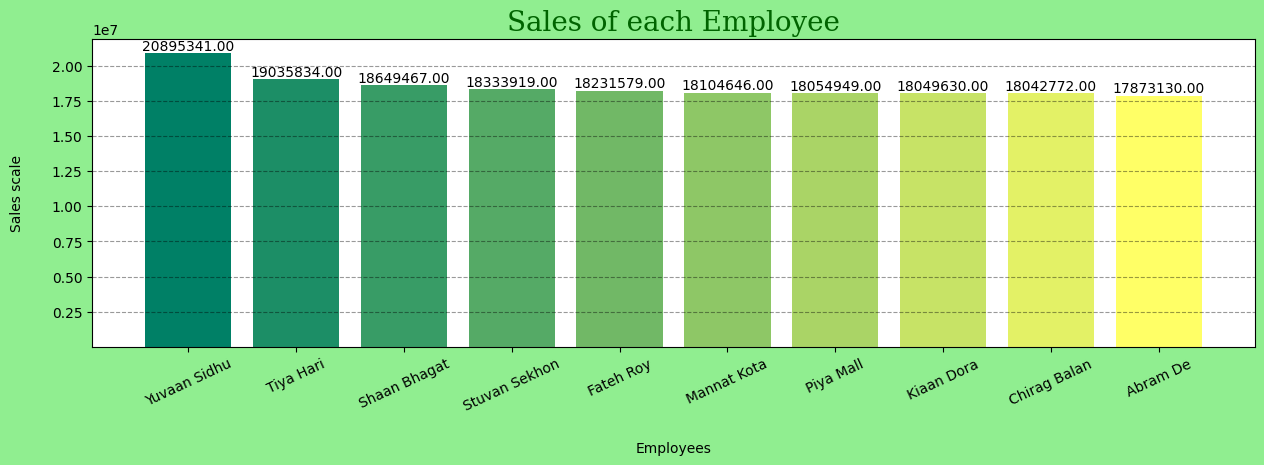

In [29]:
# query for the database
query = """ select e.EmployeeID, concat(e.firstname,' ',e.lastname) as fullname,
sum(s.totalprice) as total_sales
from employees e
join salesdata s
on s.EmployeeID=e.EmployeeID
group by EmployeeID
order by total_sales desc
   limit 10;  """
total_sales = read_query(query)

# fetching values
Names = total_sales['fullname'].values
Sales = total_sales['total_sales'].values



# setting the fonts
font = {'family': 'serif',
        'color':  'darkgreen',
        'weight': 'normal',
        'size': 20,
        }



# figure of graph
plt.figure(figsize=(15,4)) #can put facecolor here also
plt.bar(height=Sales,x=Names,bottom=20,width=0.8,color=cmap)  

# title 
plt.title('Sales of each Employee',fontdict=font)


#labels 
plt.xlabel('Employees',labelpad=20)
plt.ylabel('Sales scale',labelpad=20)

plt.grid(axis ='y',alpha=0.4,color='black',ls='dashed')
plt.gcf().set_facecolor('lightgreen')
plt.xticks(rotation=25)


# giving annotations
for i in range(len(Names)):  #put it in the strings mean names 
    
    plt.annotate(text=Sales[i],xy=(i,Sales[i]), #text is carrying the text(numbers) xy is displaying the  numbers
                 horizontalalignment='center', # its is deciding the position of number text of the bars
                 verticalalignment='bottom') 

plt.show()


6. Which category has the highest total sales?



In [30]:
query = """SELECT
c.CategoryName,
SUM(s.TotalPrice) AS TotalSales
FROM Salesdata s
JOIN Subcategories sc ON s.SubcatID = sc.SubcatID
JOIN Categories c ON sc.CategoryID = c.CategoryID
GROUP BY c.CategoryName
ORDER BY TotalSales DESC
LIMIT 1; 
"""

df = read_query(query)
df



,CategoryName,TotalSales
0,Pet Supplies and Accessories,361848986.00


ALTERNATIVE WAY

([], [])

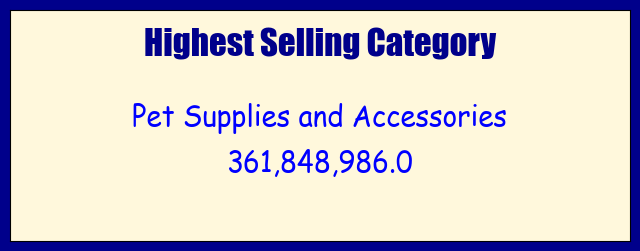

In [31]:
df = read_query(query)
categoryname = df['CategoryName'].values[0]
value = df['TotalSales'].astype(float).values[0]
value_fmt = f"{value:,}"
# Setting the plot size and background
plt.figure(figsize=(8, 3), facecolor='#00008B')
# # SETTING THE GRAPH BACKGROUND COLOR: BY 2 METHODS
# Method 1:
# setting using gca() method
# plt.gca().set_facecolor('#F0FFFF')
# Method 2
# Setting the background color of the plot using set_facecolor()
# method
ax = plt.axes()
ax.set_facecolor("#FFF8DC")
# declaring the text properties in fontdict
font_props = {'fontsize': 20, 'color': 'blue',
'fontfamily':'cursive'}
# Plot text with custom font properties
plt.text(x=0.5, y=0.8, s='Highest Selling Category',
fontdict={'fontsize': 25, 'color': '#00008B',
'fontfamily':'fantasy'},
horizontalalignment='center')
plt.text(x=0.5, y=0.5, s=categoryname,
fontdict=font_props,horizontalalignment='center')
plt.text(x=0.5, y=0.3, s=value_fmt,
fontdict=font_props,horizontalalignment='center')
# to hide the xticks and yticks
plt.xticks([])
plt.yticks([])


 7. How many customers are there in each state?

In [99]:
cmap_c = np.linspace(1,0,15)
cmap= plt.cm.RdPu(cmap_c)

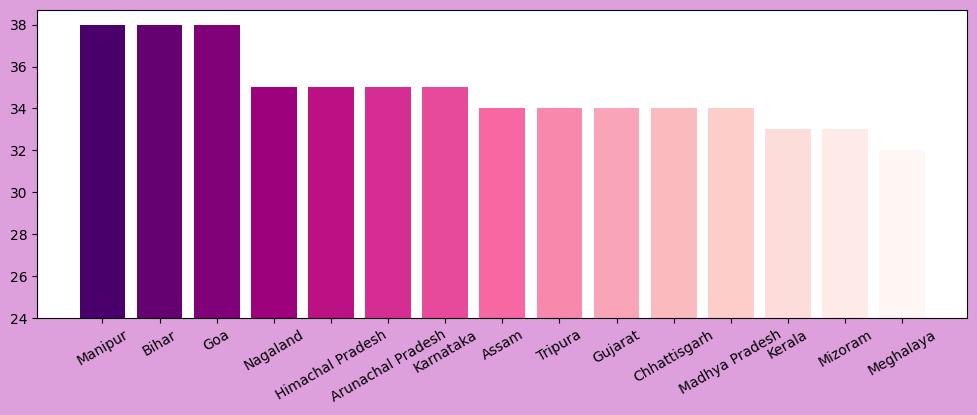

In [122]:
query = """ SELECT
State,
COUNT(*) AS TotalCustomers
FROM Customers
GROUP BY State
ORDER BY TotalCustomers desc
limit 15;
"""
state_cus = read_query(query)
state_cus


# fetching values
states=state_cus['State'].values
customers=state_cus['TotalCustomers'].values

# plotting graph 
plt.figure(figsize=(12,4),facecolor='plum')
plt.bar(height=customers,x=states,bottom=24,width=0.8,color=cmap)
plt.xticks(rotation=30)


plt.show()


8. What is the average quantity of each product sold?

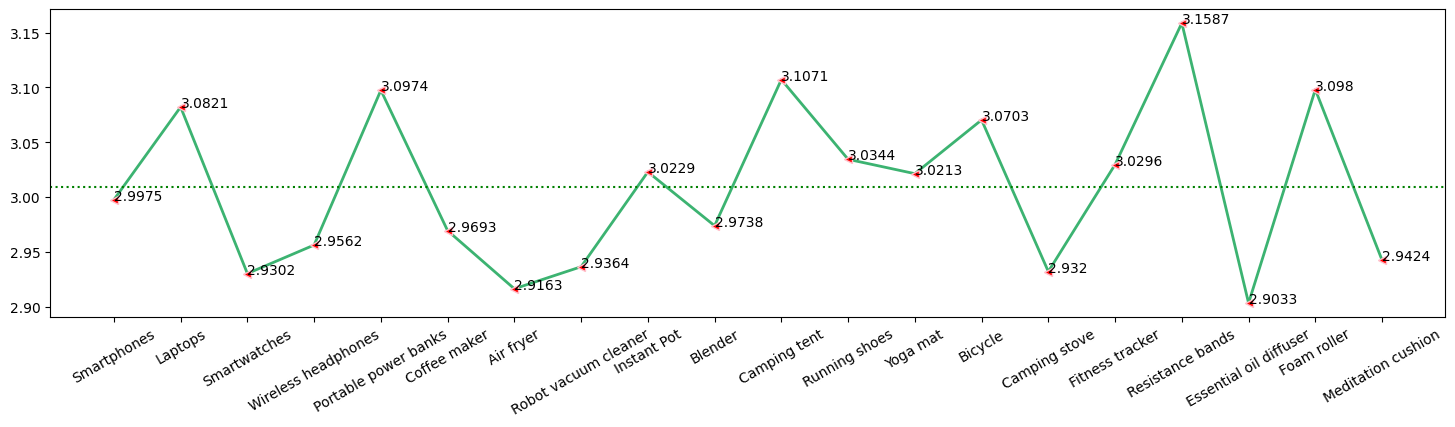

In [119]:
# query of the graph
query = """ SELECT
s.SubcatID,
sb.SubcatName,
AVG(Quantity) AS AvgQuantitySold
FROM Salesdata s
join subcategories sb on s.subcatid=sb.SubcatID
GROUP BY s.SubcatID,sb.subcatname
limit 20;
"""
avg_quantity = read_query(query)
avg_quantity


# fetching the values
subcatnames = avg_quantity['SubcatName'].values
sold = avg_quantity['AvgQuantitySold'].astype(float).values
sold


# annual average and goal line 
annual_avg = avg_quantity['AvgQuantitySold'].mean()


# plotting graph
plt.figure(figsize=(18,4))
plt.plot(subcatnames,sold,color='mediumseagreen',marker='<',mec='pink',mfc='red',lw=2)
plt.axhline(y=annual_avg,color='green',ls = 'dotted') 

for i in range(0,len(subcatnames)):

    plt.annotate(text=sold[i],xy=(i,sold[i]))
                #  horizontalalignment='center',
                #  verticalalignment='')



plt.xticks(rotation=30)

plt.show()


9. Which supplier has the highest total sales?


In [120]:
query = """ SELECT
SupplierName,
SUM(TotalPrice) AS TotalSales
FROM Salesdata s
JOIN Subcategories sc ON s.SubcatID = sc.SubcatID
JOIN Suppliers su ON sc.SupplierID = su.SupplierID
GROUP BY SupplierName
ORDER BY TotalSales DESC
LIMIT 3;
"""
df = read_query(query)
df

,SupplierName,TotalSales
0,Dora-Aggarwal,180265340.00
1,Agate-Kalita,141629408.00
2,"Sridhar, Sidhu and Maharaj",124268051.00


10. What is the total revenue generated from sales in each state?


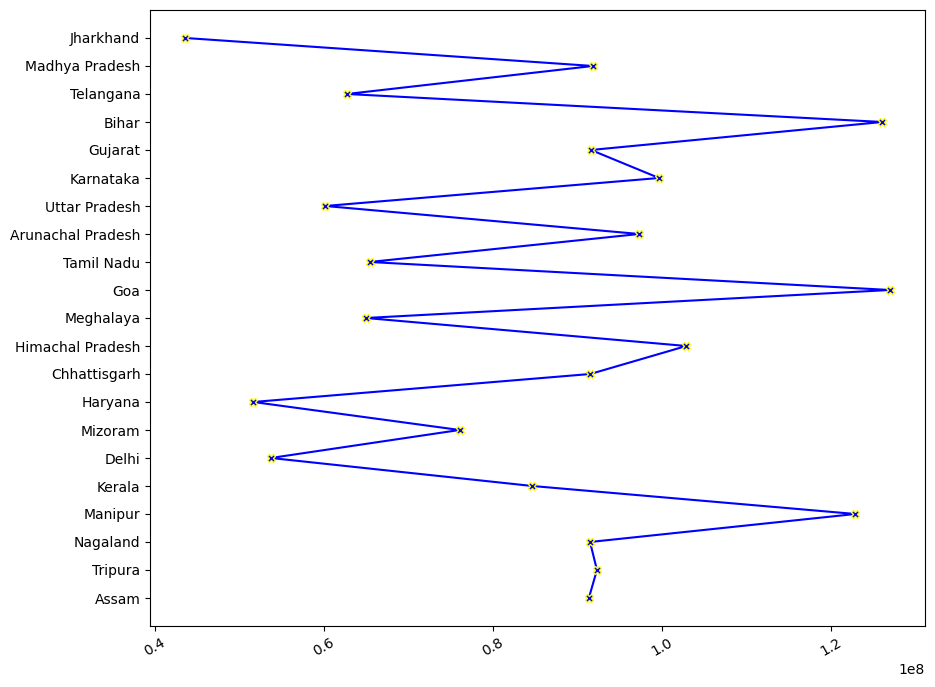

In [50]:
query = """ SELECT
c.State,
SUM(s.TotalPrice) AS TotalRevenue
FROM Salesdata s
JOIN Customers c ON s.CustomerID = c.CustomerID
GROUP BY c.State;
"""
df = read_query(query)
df


# fetching values
states = df['State'].values
revenue = df['TotalRevenue'].astype(float).values


# plotting the graph 
plt.figure(figsize=(10,8))
plt.plot(revenue,states,color='blue',marker='X',mec='yellow')
plt.xticks(rotation=30)





plt.show()

11. How many sales were made by each customer?

In [147]:
cmap_c = np.linspace(1,0,15)
cmap= plt.cm.BuGn(cmap_c)

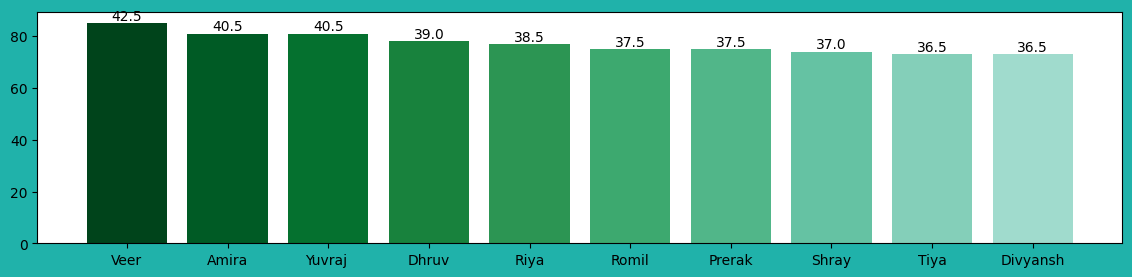

In [149]:
# query of the graph
query = """ SELECT
s.CustomerID,
c.firstname,
COUNT(*) AS TotalSales
FROM Salesdata s
join customers c
on s.CustomerID=c.CustomerID
GROUP BY s.CustomerID,c.firstname
order by TotalSales desc
limit 10;
"""
df = read_query(query)
df

# fetching values
names = df['firstname'].values
names

sales = df['TotalSales'].astype(float).values
sales

# plotting the graph
plt.figure(figsize=(14,3),facecolor='lightseagreen')
plt.bar(height=sales,x=names,color=cmap)


# annotation
for i in range(0,len(names)):
    plt.annotate(text=sales[i]/2,xy=(i,sales[i]),
                 horizontalalignment='center',
                 verticalalignment='bottom')


plt.show()

12. What is the total salary expenditure on employees in each department?

In [159]:
cmap_c = np.linspace(1,0,10)
cmap= plt.cm.Reds(cmap_c)

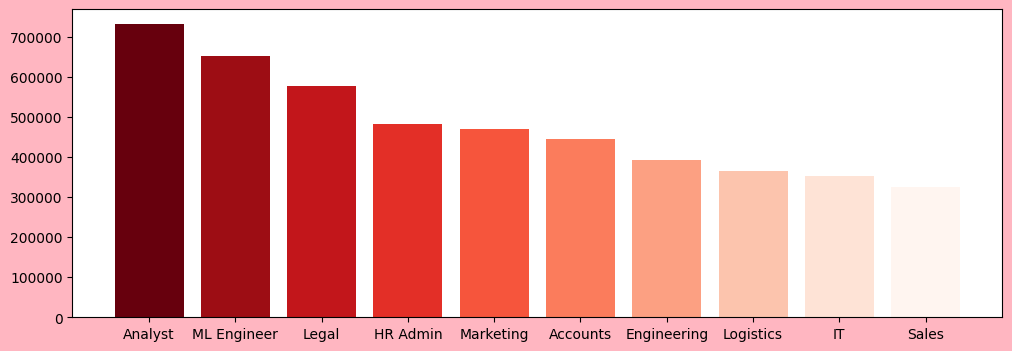

In [161]:
# query of the graph
query = """ SELECT
Department,
SUM(Salary) AS TotalSalaryExpenditure
FROM Employees
GROUP BY Department
order by TotalSalaryExpenditure desc;
"""
df = read_query(query)
df


# fetching values
departments = df['Department'].values
salary_ex = df['TotalSalaryExpenditure'].astype(float).values




# plotting graph
plt.figure(figsize=(12,4),facecolor='lightpink')
plt.bar(height=salary_ex,x=departments,width=0.8,color=cmap)





plt.show()



13. Which subcategory has the highest average unit price?


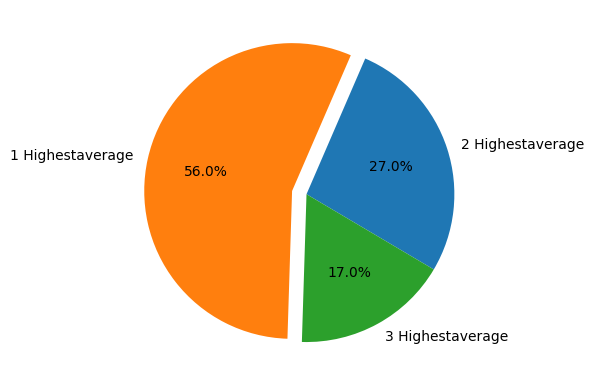

In [176]:
query = """ SELECT
SubcatName,
AVG(UnitPrice) AS AvgSellingPrice
FROM Subcategories
GROUP BY SubcatName
ORDER BY AvgSellingPrice DESC
LIMIT 3;
"""
df = read_query(query)
df

# pie chart parameters
overall_ratios = [.27, .56, .17]
labels = ['2 Highestaverage', '1 Highestaverage', '3 Highestaverage']
explode = [0,0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[2]
wedges, *_ = plt.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)


plt.show()



14. What is the total revenue generated from sales in each category?

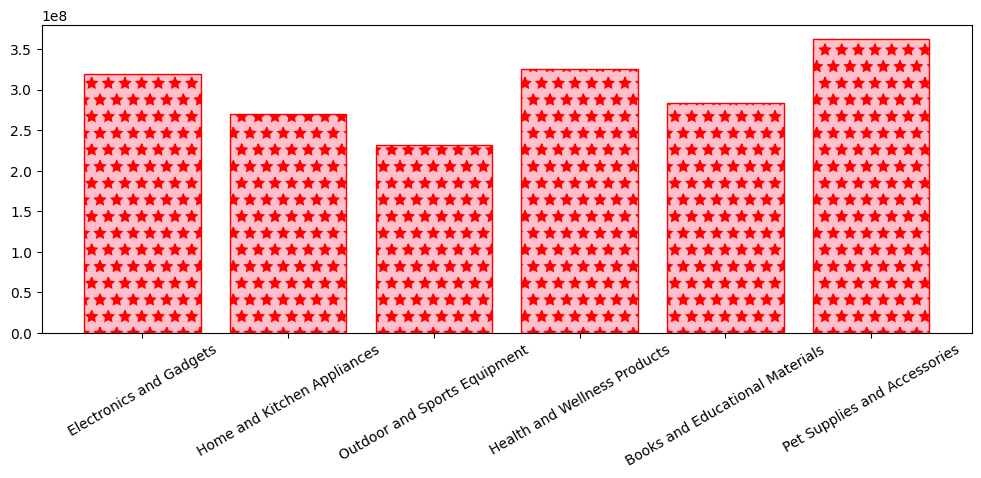

In [172]:
# query of the graph
query = """ SELECT
c.CategoryName,
SUM(s.TotalPrice) AS TotalRevenue
FROM Salesdata s
JOIN Subcategories sc ON s.SubcatID = sc.SubcatID
JOIN Categories c ON sc.CategoryID = c.CategoryID
GROUP BY c.CategoryName;
"""
df = read_query(query)
df


# fetching the values
c_names = df['CategoryName'].values
revenue = df['TotalRevenue'].astype(float).values



# plotting the graph
plt.figure(figsize=(12,4))
plt.bar(height=revenue,x=c_names,color='pink',edgecolor='red',hatch='*')

plt.xticks(rotation=30)




plt.show()

